In [2]:
import pymc3 as pm
import arviz as az
import pandas as pd
import theano.tensor as tt
import matplotlib.pyplot as plt

In [26]:
# use pymc3 to estimate the value of pi

# custom function to calculate the value of pi
def pi_calc(r, r2):
    z = r**2 + r2**2
    p = tt.le(z, 1.0) # note the use of theano.tensor
    return 4 * p
        
with pm.Model() as pi_solver:
    #priors 
    r_a = pm.Uniform('r', -1, 1)
    r_b = pm.Uniform('r2', -1, 1)
    
    #expected value
    pi = pm.Deterministic('pi', pi_calc(r_a, r_b))

    #likelihood
    trace = pm.sample(21000)

/var/folders/r3/sgb2gq8x7815ly1n7l8jrr_40000gn/T/ipykernel_98145/2529880496.py:18: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(21000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [r2, r]


/Users/benjaminharder/miniconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/benjaminharder/miniconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/benjaminharder/miniconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 21_000 draw iterations (4_000 + 84_000 draws total) took 21 seconds.


/Users/benjaminharder/miniconda3/envs/bda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


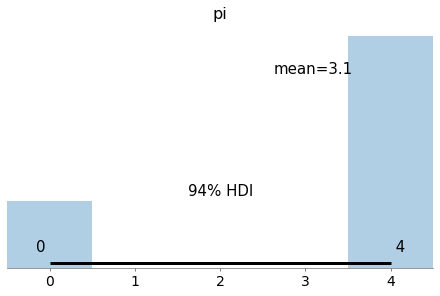

In [27]:
# plot the posterior using arviz
az.plot_posterior(trace, var_names=['pi']);

In [28]:
pm.summary(trace, kind='stats')

/Users/benjaminharder/miniconda3/envs/bda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
r,0.003,0.583,-0.882,1.000
r2,-0.002,0.584,-0.999,0.889
pi,3.096,1.673,0.000,4.000
